# Testing for various functions for template matching

In [302]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
    
def feature_detect(img, template):
    #img = cv2.imread(image,0)
    temp = cv2.imread(template,0)
    orb = cv2.ORB_create()
    
    ikp, des1 = orb.detectAndCompute(img,None)
    tkp, des2 = orb.detectAndCompute(temp,None)
    
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1,des2)
    avg_distance = 0
    for i in range(len(matches)):
        avg_distance += matches[i].distance
    avg_distance /= len(matches)
    return avg_distance
    
def play_rps(img, mode):
    image = cv2.imread(img,0)
    rock = feature_detect(image, 'rock_template.jpg')
    paper = feature_detect(image, 'paper_template.jpg')
    scissors = feature_detect(image, 'scissors_template.jpg')
    rps = [rock,paper,scissors]
    if mode == 'win':
        if min(rps) == rock:
            print('Paper!')
            return
        elif min(rps) == paper:
            print('Scissors!')
            return
        else:
            print('Rock!')
            return
    elif mode == 'draw':
        if min(rps) == rock:
            print('Rock!')
            return
        elif min(rps) == paper:
            print('Paper!')
            return
        else:
            print('Scissors!')
            return
    else:
        if min(rps) == rock:
            print('Scissors!')
            return
        elif min(rps) == paper:
            print('Rock!')
            return
        else:
            print('Paper!')
            return

def make_template_white():
    rock = cv2.imread("rock_template.jpg",0)
    paper = cv2.imread("paper_template.jpg",0)
    scissors = cv2.imread("scissors_template.jpg",0)
    ret,thresh1 = cv2.threshold(rock,155,255,cv2.THRESH_BINARY)
    ret,thresh2 = cv2.threshold(paper,250,255,cv2.THRESH_BINARY_INV)
    ret,thresh3 = cv2.threshold(scissors,250,255,cv2.THRESH_BINARY_INV)
    titles = ['rock','paper','scissors']
    images = [thresh1,thresh2,thresh3]
    for i in range(3):
        plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
        plt.title(titles[i])
    
    plt.show()
    return [thresh1,thresh2,thresh3]

Scissors!


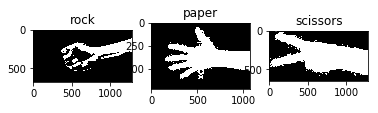

In [301]:
# feature_detect('scissors_test.jpg','rock_template.jpg')
# feature_detect('scissors_test.jpg','paper_template.jpg')
# feature_detect('scissors_test.jpg','scissors_template.jpg')
play_rps('scissors_test3.jpg','win')
make_template_white()